<a href="https://www.kaggle.com/code/arnabmukherjee853/fashion-mnist-cnn-image-classification?scriptVersionId=195340648" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Conv2D, Dense, Dropout, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D

2024-09-04 19:01:25.851882: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 19:01:25.852006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 19:01:25.987907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Loading Data from TensorFlow Fashion-Mnist**


In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(Xtrain,Ytrain), (Xtest,Ytest) = fmnist.load_data()
Xtrain, Xtest = Xtrain/255.0, Xtest/255.0
print(Xtrain.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


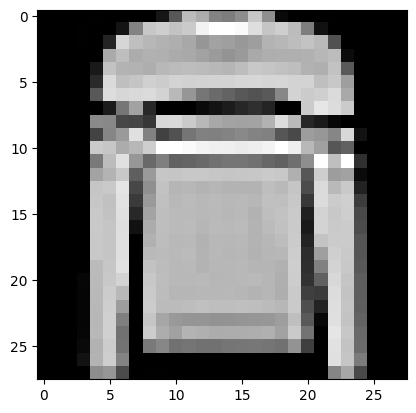

In [4]:
plt.imshow(Xtrain[5], cmap='gray')
plt.show()

In [5]:
Xtrain = np.expand_dims(Xtrain, -1)
Xtest = np.expand_dims(Xtest, -1)
print(Xtrain.shape)

(60000, 28, 28, 1)


In [6]:
K = len(set(Ytrain))
print("No of Predictive Classes ",K)

No of Predictive Classes  10


**Building a simple CNN model using keras functional api**

In [7]:
i = Input(shape=Xtrain[0].shape)
x = Conv2D(32,(3,3), strides=2, activation='relu')(i)
x = Conv2D(64,(3,3), strides=2, activation='relu')(x)
x = Conv2D(128,(3,3), strides=2, activation='relu')(x)

x = Flatten()(x)
x = Dense(200, activation='relu')(x)
x = Dropout(.22)(x)
x = Dense(400, activation='relu')(x)
x = Dropout(.22)(x)
x = Dense(K, activation='softmax')(x)
model = Model(i,x)

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=10)

Epoch 1/10
  68/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3898 - loss: 1.7522

I0000 00:00:1725476528.421749     101 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1725476528.442475     101 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7423 - loss: 0.7086 - val_accuracy: 0.8538 - val_loss: 0.3894
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8594 - loss: 0.3744 - val_accuracy: 0.8654 - val_loss: 0.3544
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8835 - loss: 0.3134 - val_accuracy: 0.8833 - val_loss: 0.3205
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8961 - loss: 0.2741 - val_accuracy: 0.8896 - val_loss: 0.3064
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9094 - loss: 0.2414 - val_accuracy: 0.8914 - val_loss: 0.3004
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9146 - loss: 0.2266 - val_accuracy: 0.8841 - val_loss: 0.3373
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9241 - loss: 0.2008 - val_accuracy: 0.8960 - val_loss: 0.3036
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9272 - loss: 0.1884 - val_accura

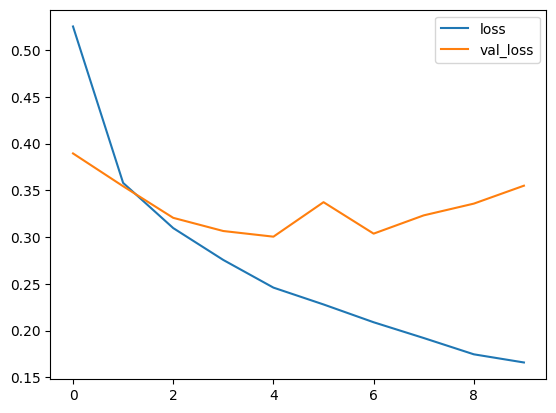

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

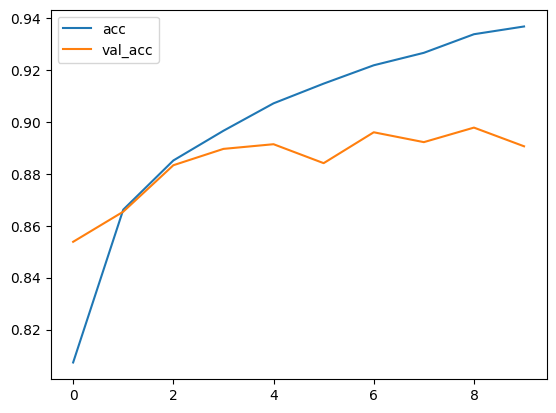

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
p_test = model.predict(Xtest).argmax(axis=1)
confusion_matrix(Ytest, p_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[782,   1,  23,  26,   3,   1, 156,   0,   8,   0],
       [  3, 974,   0,  14,   3,   0,   5,   0,   1,   0],
       [  8,   0, 766,  10,  92,   0, 123,   0,   1,   0],
       [ 11,   5,  10, 904,  39,   0,  31,   0,   0,   0],
       [  1,   2,  29,  18, 850,   0,  99,   0,   1,   0],
       [  0,   0,   1,   2,   0, 945,   0,  21,   4,  27],
       [ 57,   1,  38,  31,  74,   0, 794,   0,   5,   0],
       [  0,   0,   0,   0,   0,   8,   0, 984,   0,   8],
       [  0,   0,   2,   2,   4,   3,  12,   3, 974,   0],
       [  1,   0,   0,   0,   0,   3,   0,  62,   1, 933]])

In [12]:
print(classification_report(Ytest, p_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.77      0.82      1000
           3       0.90      0.90      0.90      1000
           4       0.80      0.85      0.82      1000
           5       0.98      0.94      0.96      1000
           6       0.65      0.79      0.72      1000
           7       0.92      0.98      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [13]:
i = Input(shape= Xtrain[0].shape)
x = Conv2D(32,(3,3), strides=(2,2), padding='same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3), strides=(2,2), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x = Flatten()(x)
x = Dropout(.2)(x)
x = Dense(200, activation='relu')(x)
x = Dropout(.2)(x)
x = Dense(400, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

MOdel = Model(i,x)
MOdel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
R = MOdel.fit(Xtrain, Ytrain, validation_data=(Xtest,Ytest), epochs=15)
# batch_size= 50
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
#                                                                  height_shift_range=0.1,
#                                                                  horizontal_flip=True,
#                                                                  vertical_flip=True,
#                                                                  rotation_range=45)
# train_generator = data_generator.flow(Xtrain, Ytrain, batch_size)
# steps_per_epoch = Xtrain.shape[0]//batch_size
# R = MOdel.fit_generator(train_generator,
#                         validation_data=(Xtest,Ytest),
#                         steps_per_epoch= steps_per_epoch,
#                         epochs=25)

Epoch 1/15
  58/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4662 - loss: 1.6044

W0000 00:00:1725476606.942336      98 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7602 - loss: 0.6680 - val_accuracy: 0.8411 - val_loss: 0.4623
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8705 - loss: 0.3545 - val_accuracy: 0.8733 - val_loss: 0.3293
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8929 - loss: 0.2978 - val_accuracy: 0.8997 - val_loss: 0.2814
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9004 - loss: 0.2710 - val_accuracy: 0.8984 - val_loss: 0.2897
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9104 - loss: 0.2460 - val_accuracy: 0.9064 - val_loss: 0.2685
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.2259 - val_accuracy: 0.9046 - val_loss: 0.2641
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9234 - loss: 0.2086 - val_accuracy: 0.9043 - val_loss: 0.2680
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9274 - loss: 0.1950 - val_accura

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
pm_test = MOdel.predict(Xtest).argmax(axis=1)
confusion_matrix(Ytest, pm_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[896,   1,  12,  20,   3,   1,  63,   0,   3,   1],
       [  2, 986,   0,   6,   0,   0,   3,   0,   3,   0],
       [ 16,   1, 863,  12,  63,   0,  44,   0,   0,   1],
       [ 10,   6,   6, 954,  11,   0,  13,   0,   0,   0],
       [  0,   2,  41,  40, 872,   0,  45,   0,   0,   0],
       [  0,   0,   0,   0,   0, 985,   0,   7,   0,   8],
       [122,   2,  51,  29,  62,   0, 726,   0,   8,   0],
       [  0,   0,   0,   0,   0,  10,   0, 961,   0,  29],
       [  1,   2,   1,   5,   2,   2,   1,   2, 979,   5],
       [  0,   0,   0,   0,   0,   4,   0,  23,   0, 973]])

In [15]:
print(classification_report(Ytest, pm_test))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.86      0.87      1000
           3       0.89      0.95      0.92      1000
           4       0.86      0.87      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.81      0.73      0.77      1000
           7       0.97      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



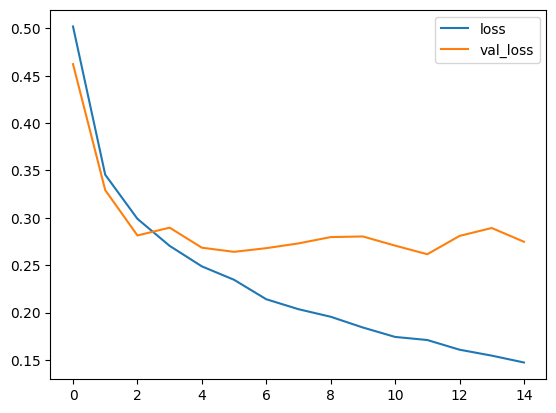

In [16]:
plt.plot(R.history['loss'], label='loss')
plt.plot(R.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

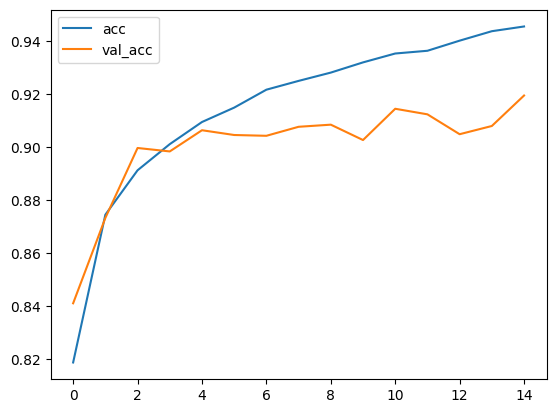

In [17]:
plt.plot(R.history['accuracy'], label='acc')
plt.plot(R.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()